# 0. 설정

In [ ]:
# 공통 모듈 임포트
import sklearn
import numpy as np
import pandas as pd

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


import sys
#os: Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게하는 모듈
import os
#tarfile: 여러 개의 파일을 tar 형식으로 합치거나 이를 해제할 때 사용하는 모듈
import tarfile
#urllib: URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import urllib.request

#1. 문제 정의 및 데이터 수집

- https://www.kaggle.com/datasets/camnugent/california-housing-prices
- https://becomeanexpert.tistory.com/3


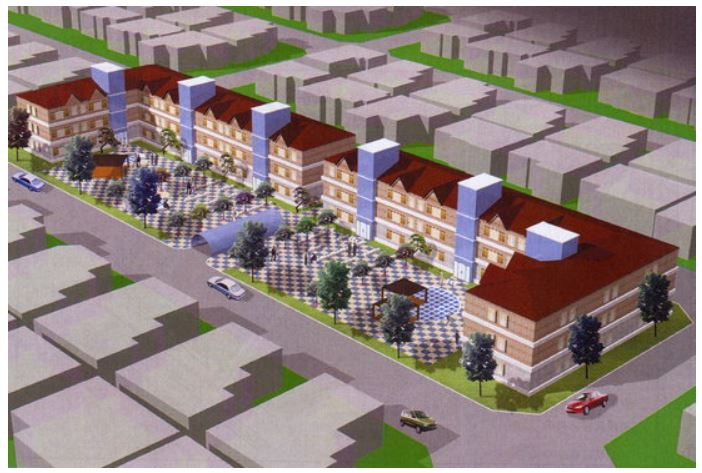

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
# 파일은 코랩 환경에서 다운받아서 압축 해제


In [ ]:
# 압축 해제된 csv 파일을 판다스 데이터프레임 객체에 담기.
# housing = 

#2. 점검 및 탐색

## 데이터 탐색

In [ ]:
# 데이터 확인하기, 셀의 마지막줄에 객체 입력 시 확인 가능,


- longitude: 경도 
- latitude: 위도
- housing_median_age: 주택이 지어진 기간(중앙값)
- total_bedrooms: 전체 방의 개수
- total_bedrooms: 전체 침실 개수
- population: 인구 수
- households: 세대 수
- median_income: 중간 소득
- median_house_value: 중간 주택 가격
- ocean_proximity: 바다 접근도

In [ ]:
# 데이터탐색 방법: head(), tail()


In [ ]:
# 데이터 행, 열 개수 확인: shape()


In [ ]:
# 데이터 칼럼 이름 추출: columns()


In [ ]:
# 특정 칼럼의 데이터 확인: dtype()


In [ ]:
#결측치 개수 확인: isnull(),sum()


In [ ]:
# 결측치 시각화 모듈: missingno - missingno.matrix()


In [ ]:
# 데이터 요약 자료를 전체 한눈에 확인하기: info()


In [ ]:
# 데이터의 통계 자료 확인하기: describe()


In [ ]:
# 특정 칼럼의 데이터 카테고리별 값 세기: value_counts(), 범주형 데이터에 주로 사용


In [ ]:
# 어려운 버전: groupby + 다른 집계 함수 설명.


## 시각화

- seaborn 시각화 자료: https://seaborn.pydata.org/examples/index.html
- 예제 블로그: https://coding-kindergarten.tistory.com/133?category=1003348

In [ ]:
#히스토그램: data.hist(bins=분할 갯수, figsize=(가로,세로))

In [ ]:
# 산점도와 히스토그램을 같이 확인하고 싶을 때: pairplot(data, corner = True)


피어슨의 상관 계수(위키백과):
![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [ ]:
# 상관분석: .corr()

In [ ]:
#종속변수와 독립변수간의 상관관계
#corr_matrix = housing.corr()
#corr_matrix["median_house_value"].sort_values(ascending=False)

**cmap 관련 예제**
- 참고 자료: https://wikidocs.net/141538

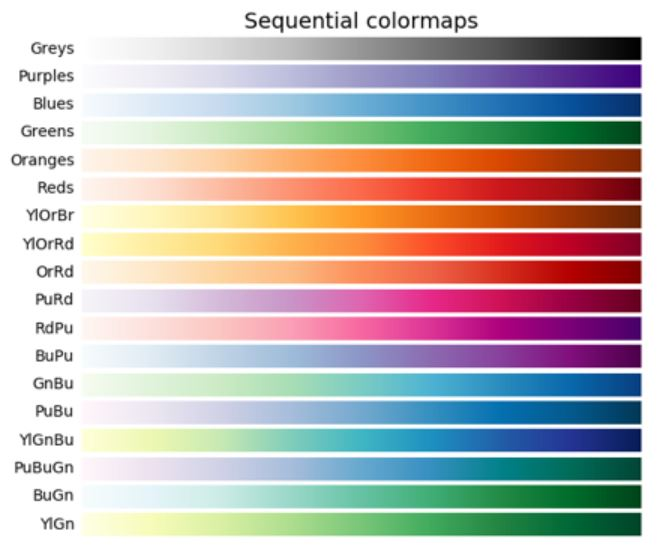

In [ ]:
# 상관분석의 시각화: .heatmap(data, annot = True, cmap='color')

In [ ]:
# 위도 경도를 통한 지도 위치 확인과 인구 밀집도 확인, 산점도 사용
#housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
#             s=housing["population"]/100, label="population", figsize=(10,7),
#             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
#             sharex=False)
#plt.legend()

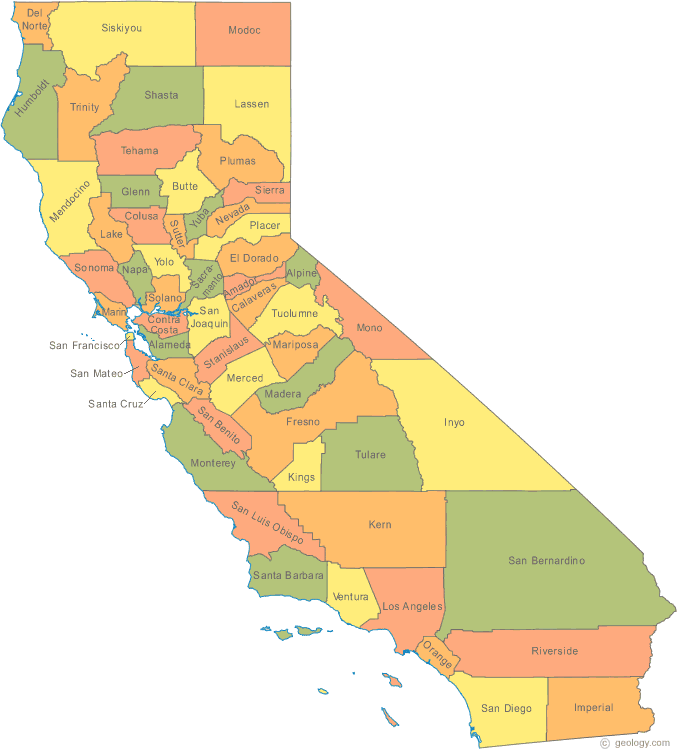

In [ ]:
# 산점도를 사용한 데이터 탐색: scatterplot 

In [ ]:
# 차트 여려개 한번에 출력하기 subplots(nrows = 행의 개수,ncolumns = 열의 개수)
# 여러개 출력할 때의 사이즈 조정 방법:subplots에서 반환된 fig에서 .set_size_inches(가로, 세로) 사용


#3. 전처리 및 정제

In [ ]:
#연속형 데이터를 범주형 데이터로 변: cut()
data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.hist(data["median_income"])

plt.subplot(222)
plt.hist(data["income_cat"])
plt.show()

In [ ]:
# 연속형 데이터 비교: median_income .value_counts()

In [ ]:
# 범주형 데이터 비교: income_cat .value_counts()

In [ ]:
# 어려운 버전: groupby + 다른 집계 함수 설명.

In [ ]:
# 데이터 생성 후 시각화1: sns.barplot(data=housing, x = 'income_cat', y = '')

In [ ]:
# 데이터 생성 후 시각화2: sns.boxplot(data=housing, x="income_cat", y="")

In [ ]:
# 데이터 생성 후 시각화3: sns.violinplot(data=housing, x="income_cat", y="")

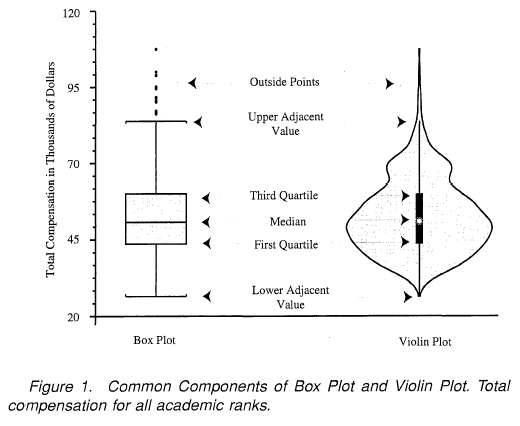



In [ ]:
# 결측치 처리: sample = housing[housing.isnull().any(axis=1)].head()

In [ ]:
# 결측치 처리 옵션1: EDA 결과 해당 칼럼은 필요 없을 것 같다.
# housing.dropna(subset=["total_bedrooms"])

In [ ]:
# 결측치 처리 옵션2: EDA 결과 해당 칼럼은 반드시 필요하다.
# housing.drop("total_bedrooms", axis=1)

In [ ]:
# 결측치 처리 옵션3: 군집화를 이용한 카테고리 분류
# X

In [ ]:
# 이상값
# 상위 1%의 급여를 이상치로 처리해야할까? 
# 다른 예: 회사 급여 관련 데이터를 다룰때 CEO의 급여는 포함되어야하는가?

In [ ]:
# 노이즈 데이터
# X

# 데이터 통합
# X

In [ ]:
# 범주형 데이터 - 문자열 처리 OrdinalEncoder vs OnehotEncoder
#from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import OneHotEncoder

# housing_cat = housing[["ocean_proximity"]]
# housing_cat.head(10)

In [ ]:
# OnehotEncoder, 결과값이 희소행렬로 반환되기에 데이터를 확인하고 싶다면 .toarray()를 사용하여 배열로 변환해야함.처음부터 배열로 반환하려면 sparse = False 부여
#housing_cat_1hot.toarray()
cat_encoder = OneHotEncoder(sparse = False)
housing_1hot = cat_encoder.fit_transform(data)
housing_1hot 

In [ ]:
# 기존 데이터 칼럼 삭제 및 인코딩된 데이터 추가: .drop("삭제 행", axis=1)
# housing_num = 

In [ ]:
#새로 생성된 One hot Encoding 데이터 추가: ['ocean_proximity1', 'ocean_proximity2','ocean_proximity3','ocean_proximity4','ocean_proximity5']


In [ ]:
# 특징 공학
# 주민번호, ID와 같이 필요 없는 데이터는 삭제

In [ ]:
# 특징 공학 
# 컬럼 추가

# 가구 수 대비 방의 개수
#housing["rooms_per_household"] = 

# 방 대비 침실 개수
#housing["bedrooms_per_room"] = 

# 가구 수 대비 인구 수
#housing["population_per_household"]=

In [ ]:
# 데이터 추가 후 종속변수와 독립변수 간의 상관분석


In [ ]:
#데이터 변환을 위한 열 분리

In [ ]:
# 데이터 변환 => 정규화, 표준화
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler


###StratifiedShuffleSplit vs train_test_split


데이터 분리
- StratifiedShuffleSplit: 기준으로 삼은 데이터의 카테고리 비율과 같도록 훈련셋, 검증셋 분리
- train_test_split: 무작위 추출

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_train_set

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set

In [ ]:
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

In [ ]:
# 훈련, 테스트 데이터셋를 분리한 후 X,Y 분리.
# housing = train_set.drop("median_house_value", axis=1) 
# housing_labels = train_set["median_house_value"].copy()

In [ ]:
#housing.drop("median_house_value", axis=1) 
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
#train_set

#4. 모델링 및 훈련
#5. 검증 및 평가

In [ ]:
from sklearn.linear_model import LinearRegression

#lin_reg = LinearRegression()
#lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#forest_reg = ModelClass(n_estimators=100)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#tree_reg = 

In [ ]:
# MSE, RMSE
from sklearn.metrics import mean_squared_error

data_predictions = MLmodel.predict(X_test)
mse = mean_squared_error(y_test, data_predictions)
rmse = np.sqrt(mse)
print(f"모델 결과: {rmse}")

In [ ]:
# MAE, RMAE
from sklearn.metrics import mean_absolute_error

data_predictions = MLmodel.predict(X_test)
mae = mean_absolute_error(y_test, data_predictions)
rmae = np.sqrt(mae)
rmae

### K-fold Cross Validation

In [ ]:
# 교차검증, k-fold cross validation
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

### Grid Search

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
# 가장 성능이 좋은 모델의 파라미터
grid_search.best_params_

In [ ]:
# 가장 성능이 좋은 모델
grid_search.best_estimator_

In [ ]:
# 테스트를 거친 모델의 성능과 하이퍼 파라미터 값
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
# 전체 결과 데이터를 데이터프레임을 사용하여 확인, cv_results_
pd.DataFrame(grid_search.cv_results_)

In [ ]:
# 데이터 표현 형태 변경
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
# 데이터 형태 복구
pd.reset_option('display.float_format')

##결과 시각화

In [ ]:
plt.figure(figsize= (8, 6))
sns.scatterplot(x= data_predictions, y= y_test, color= '#005b96')
plt.xlabel('Actual value')
plt.ylabel('Predicted Value')
plt.show()

In [ ]:
plt.figure(figsize= (8, 6))
sns.residplot(x= data_predictions, y = y_test, color= '#005b96')
plt.show()

In [ ]:
resid = data_predictions - y_test
plt.figure(figsize= (8, 6))
sns.histplot(resid)
plt.xlabel('Error');

In [ ]:
# 이산형 데이터의 경우 히스토그램으로 표현

# Pipeline 구축

In [ ]:
housing = load_housing_data()

In [ ]:
#훈련 X,y, 테스트 X,y 데이터셋 분리
X_housing =housing.drop('median_house_value', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_housing, housing['median_house_value'].copy(), test_size=0.2, random_state=42)

In [ ]:
# 참고 블로그: https://databuzz-team.github.io/2018/11/11/make_pipeline/
# 칼럼별 전처리를 위한 데이터 칼럼 선택 클래스
from sklearn.base import BaseEstimator, TransformerMixin

# 수치형 열과 범주형 열을 선택하기 위한 클래스
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
"""
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())
"""

In [ ]:
#결측치 처리 모듈: SimpleImputer
#from sklearn.impute import SimpleImputer

# ocean_proximity로 인해 에러 발생 => housing_num = housing.drop("ocean_proximity", axis=1)
#imputer = SimpleImputer(strategy="median")
#print(imputer.strategy)
#imputer.fit(housing_num)

#imputer.statistics_
#housing_num.median().values

#X = imputer.transform(housing_num)
#housing_tr = pd.DataFrame(X, columns=housing_num.columns,
#                          index=housing_num.index)

In [ ]:
# Pipe Line 
from sklearn.pipeline import Pipeline

#num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [ ]:
# 데이터셋을 나누어 각각의 파이트라인을 거친 후 재결합하기 위한 모듈: FeatureUnion, ColumnTransformer
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

In [ ]:
from sklearn.compose import ColumnTransformer #셀렉터 필요 없음
num_attribs= ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
#num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler()),
    ])

cat_pipeline = Pipeline([
        ('cat_encoder', OneHotEncoder(handle_unknown="ignore")),
    ])


full_pipeline = ColumnTransformer(transformers = [
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(X_train)
housing_prepared

In [ ]:
clf = Pipeline(
    steps=[("FullPipe", full_pipeline), 
           ("classifier", RandomForestRegressor())]
        )

y_pred = clf.fit(X_train, y_train)

#6. 배포

In [ ]:
#my_model = model or piplineModel

import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF